In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0ab2829e35d7a21c451374621c2450f18532d517a42bc69094b527e03df2d888
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col, when, count, desc, lit, avg
from matplotlib.table import Table
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
# Create a Spark session
spark = SparkSession.builder.appName("BigData").getOrCreate()

In [3]:
df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("Clean_Dataset.csv")
df.cache()
df.count()

4243

In [4]:
df.printSchema()

root
 |-- Car_name: string (nullable = true)
 |-- Num_of_reviews: double (nullable = true)
 |-- General_rate: double (nullable = true)
 |-- Comfort: double (nullable = true)
 |-- Interior design: double (nullable = true)
 |-- Performance: double (nullable = true)
 |-- Value for the money: double (nullable = true)
 |-- Exterior styling: double (nullable = true)
 |-- Reliability: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)



In [5]:
df.show()

+--------------------+--------------+------------+-------+---------------+-----------+-------------------+----------------+-----------+----+-----+-----------------+
|            Car_name|Num_of_reviews|General_rate|Comfort|Interior design|Performance|Value for the money|Exterior styling|Reliability|Year|Brand|            Model|
+--------------------+--------------+------------+-------+---------------+-----------+-------------------+----------------+-----------+----+-----+-----------------+
|2023     Acura   ...|           5.0|         4.6|    4.4|            4.4|        4.6|                4.2|             5.0|        4.8|2023|Acura|         Integra.|
|2023     Acura   ...|         55.58|       4.627|  4.655|          4.626|      4.617|              4.479|           4.718|      4.629|2023|Acura|             MDX.|
|2023     Acura   ...|         55.58|       4.627|  4.655|          4.626|      4.617|              4.479|           4.718|      4.629|2023|Acura|             TLX.|
|2023     

In [6]:
df.dtypes

[('Car_name', 'string'),
 ('Num_of_reviews', 'double'),
 ('General_rate', 'double'),
 ('Comfort', 'double'),
 ('Interior design', 'double'),
 ('Performance', 'double'),
 ('Value for the money', 'double'),
 ('Exterior styling', 'double'),
 ('Reliability', 'double'),
 ('Year', 'int'),
 ('Brand', 'string'),
 ('Model', 'string')]

In [7]:
df.describe().show()

+-------+--------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-----+-----------------+
|summary|            Car_name|    Num_of_reviews|       General_rate|           Comfort|    Interior design|        Performance|Value for the money|  Exterior styling|        Reliability|              Year|Brand|            Model|
+-------+--------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-----+-----------------+
|  count|                4243|              4243|               4243|              4243|               4243|               4243|               4243|              4243|               4243|              4243| 4243|             4243|
|   mean|                NULL|55.579806740512986|   4.62696865425409|4.65489

In [8]:
df = df.dropna()
df.count()

4243

In [9]:
df.head(1)

[Row(Car_name='2023     Acura     Integra.', Num_of_reviews=5.0, General_rate=4.6, Comfort=4.4, Interior design=4.4, Performance=4.6, Value for the money=4.2, Exterior styling=5.0, Reliability=4.8, Year=2023, Brand='Acura', Model='Integra.')]

In [10]:
df.columns

['Car_name',
 'Num_of_reviews',
 'General_rate',
 'Comfort',
 'Interior design',
 'Performance',
 'Value for the money',
 'Exterior styling',
 'Reliability',
 'Year',
 'Brand',
 'Model']

In [11]:
df.head()

Row(Car_name='2023     Acura     Integra.', Num_of_reviews=5.0, General_rate=4.6, Comfort=4.4, Interior design=4.4, Performance=4.6, Value for the money=4.2, Exterior styling=5.0, Reliability=4.8, Year=2023, Brand='Acura', Model='Integra.')

In [12]:
# Nhóm theo 'Brand' và 'Year' và tính trung bình của 'General_rate'
result = df.groupBy('Brand', 'Year').agg(avg('General_rate').alias('General_rate'))

# Sắp xếp kết quả
result = result.orderBy('Brand', 'Year')

# Hiển thị kết quả
result.show()

+-----+----+------------------+
|Brand|Year|      General_rate|
+-----+----+------------------+
|Acura|2012| 4.659999999999999|
|Acura|2013| 4.583333333333333|
|Acura|2014| 4.633333333333334|
|Acura|2015|              4.66|
|Acura|2016|               4.5|
|Acura|2017|            4.6875|
|Acura|2018| 4.699999999999999|
|Acura|2019|          4.665875|
|Acura|2020| 4.674999999999999|
|Acura|2021|           4.73175|
|Acura|2022|            4.7108|
|Acura|2023|4.6202499999999995|
| Audi|2012|             4.575|
| Audi|2013| 4.657894736842105|
| Audi|2014| 4.699999999999999|
| Audi|2015|4.7272727272727275|
| Audi|2016|              4.75|
| Audi|2017| 4.736363636363636|
| Audi|2018|4.7761249999999995|
| Audi|2019|           4.77135|
+-----+----+------------------+
only showing top 20 rows



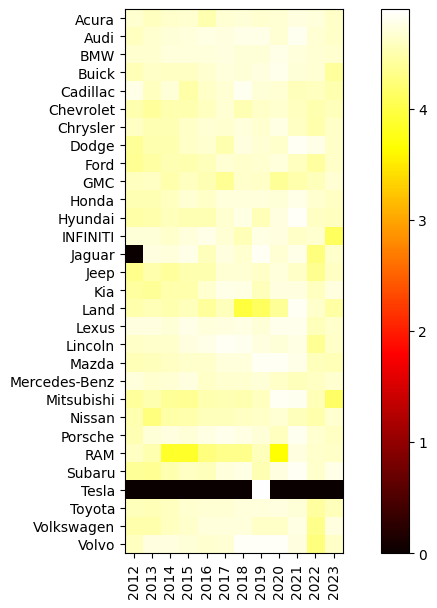

In [13]:
# Lấy danh sách các hãng xe và các năm duy nhất từ dữ liệu
brands = df.select('Brand').distinct().orderBy('Brand').rdd.flatMap(lambda x: x).collect()
years = df.select('Year').distinct().orderBy('Year').rdd.flatMap(lambda x: x).collect()

# Khởi tạo từ điển để giữ trung bình tỷ lệ cho mỗi hãng xe
brand_avg_rates = {brand: [] for brand in brands}

# Tính trung bình tỷ lệ hàng năm cho mỗi hãng xe
for brand in brand_avg_rates.keys():
    # Lọc DataFrame theo hãng xe cụ thể
    df_brand = df.filter(df['Brand'] == brand)

    # Tính trung bình tỷ lệ hàng năm cho hãng xe trong DataFrame đã lọc
    for year in years:
        avg_rate = df_brand.filter(df_brand['Year'] == year).select(avg('General_rate')).collect()

        # Nếu không có dữ liệu (tỷ lệ) cho năm đó, thêm None để duy trì độ dài danh sách nhất quán
        if avg_rate:
            brand_avg_rates[brand].append(avg_rate[0][0])
        else:
            brand_avg_rates[brand].append(None)

# Chuyển đổi dữ liệu thành dạng list của lists để vẽ heatmap
heatmap_data = [brand_avg_rates[brand] for brand in brands] # Dòng này cần chạy trước (chỉ lần đầu còn các lần sau nó sẽ lưu lại)

# Thay thế các giá trị None bằng 0.0
heatmap_data = [[value if value is not None else 0.0 for value in sublist] for sublist in heatmap_data]

# Vẽ heatmap sử dụng matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=range(len(years)), labels=years, rotation=90)  # Xoay các nhãn trục x
plt.yticks(ticks=range(len(brands)), labels=brands)
plt.subplots_adjust(bottom=0.2)  # Điều chỉnh khoảng cách giữa các nhãn
plt.show()

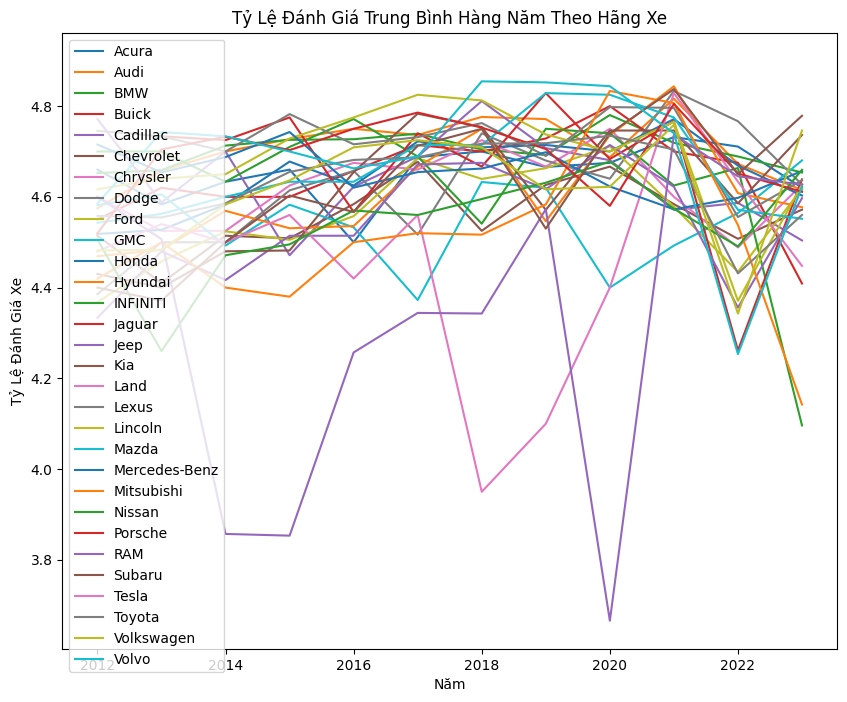

In [14]:
# Vẽ biểu đồ dòng sử dụng matplotlib
plt.figure(figsize=(10, 8))

for brand, rates in brand_avg_rates.items():
    plt.plot(years, rates, label=brand)

plt.xlabel('Năm')
plt.ylabel('Tỷ Lệ Đánh Giá Xe')
plt.title('Tỷ Lệ Đánh Giá Trung Bình Hàng Năm Theo Hãng Xe')
plt.legend()
plt.show()

In [15]:
# Phân loại các hãng xe thành các khu vực như Châu Á hoặc Nhật Bản, Hàn Quốc, Mỹ, Châu Âu, Anh, Hàn Quốc.

JAPAN_cars = ("Acura", "Mazda", "Lexus", "Subaru", "Nissan", "Toyota", "Mitsubishi", "Honda", "INFINITI")
KOREA_cars = ("Hyundai", "Kia")
UK_cars = ("Jaguar", "Land")
EU_cars = ("Volvo", "Porsche", "Ford", "Mercedes-Benz")
US_cars = ("Ford", "Dodge","Tesla","Buick", "Cadillac", "Chevrolet", "Chrysler", "Jeep", "GMC", "Lincoln", "RAM")
Country_brands = (JAPAN_cars, KOREA_cars, UK_cars, EU_cars, US_cars)
Countries = ("JAPAN", "KOREA", "UK", "EU", "US")

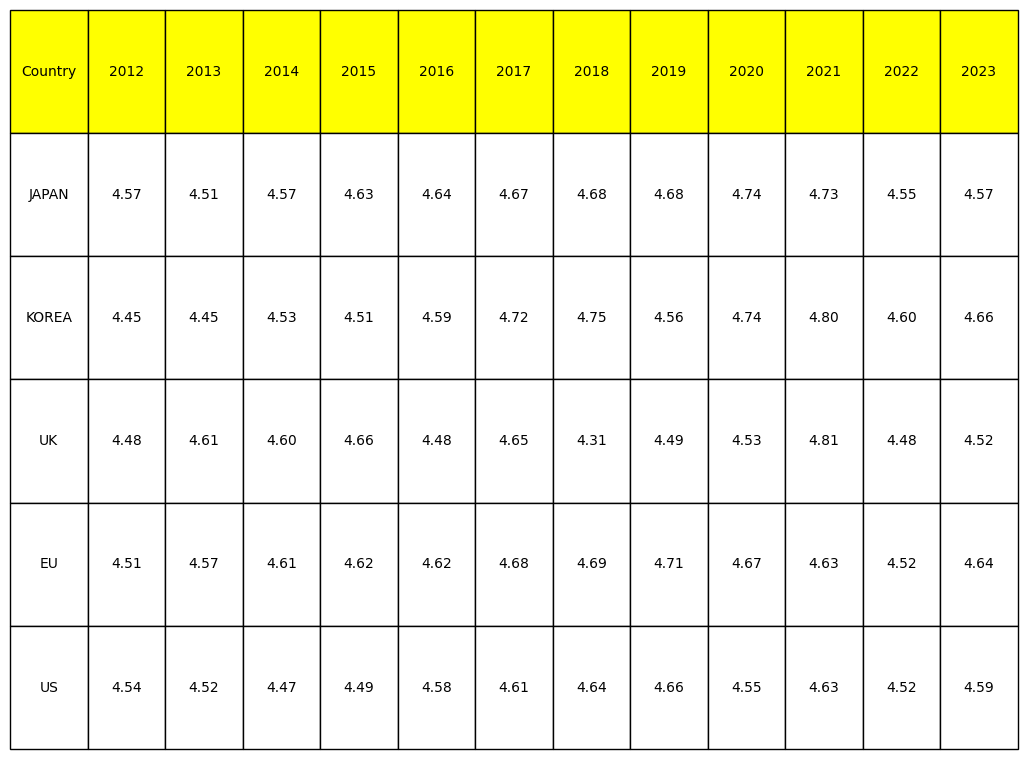

In [16]:
# Tạo cột 'Country' dựa trên cột 'Brand'
def assign_country(brand):
    for country, brands in zip(Countries, Country_brands):
        if brand in brands:
            return country
    return None

assign_country_udf = F.udf(assign_country)

df = df.withColumn('Country', assign_country_udf(F.col('Brand')))

# Danh sách các quốc gia và các năm duy nhất từ dữ liệu
years = sorted(df.select('Year').distinct().rdd.flatMap(lambda x: x).collect())

# Tạo một bảng để lưu trữ tỷ lệ trung bình hàng năm cho mỗi quốc gia
data_table = []

# Tính trung bình tỷ lệ hàng năm cho mỗi quốc gia
for country in Countries:
    row_data = []
    for year in years:
        avg_rate = df.filter((df['Country'] == country) & (df['Year'] == year)).select(avg('General_rate')).collect()
        rate = avg_rate[0][0] if avg_rate else 0.0  # Thay thế None bằng 0.0
        row_data.append(rate)
    data_table.append(row_data)

# Vẽ bảng sử dụng matplotlib
fig, ax = plt.subplots(figsize=(12, 8))  # Đặt kích thước cho bảng
ax.set_axis_off()  # Ẩn các trục

table = Table(ax, bbox=[0, 0, 1, 1])

# Thêm hàng tiêu đề
header_row = ['Nước'] + years
table.add_cell(-1, -1, width=0.1, height=0.05, text='Country', loc='center', facecolor='yellow')
for i, year in enumerate(years):
    table.add_cell(-1, i, width=0.1, height=0.05, text=str(year), loc='center', facecolor='yellow')

# Thêm dữ liệu vào bảng
for i, row in enumerate(data_table):
    table.add_cell(i, -1, width=0.1, height=0.05, text=Countries[i], loc='center')
    for j, val in enumerate(row):
        table.add_cell(i, j, width=0.1, height=0.05, text=f'{val:.2f}', loc='center')

# Thêm bảng vào biểu đồ
ax.add_table(table)
plt.show()

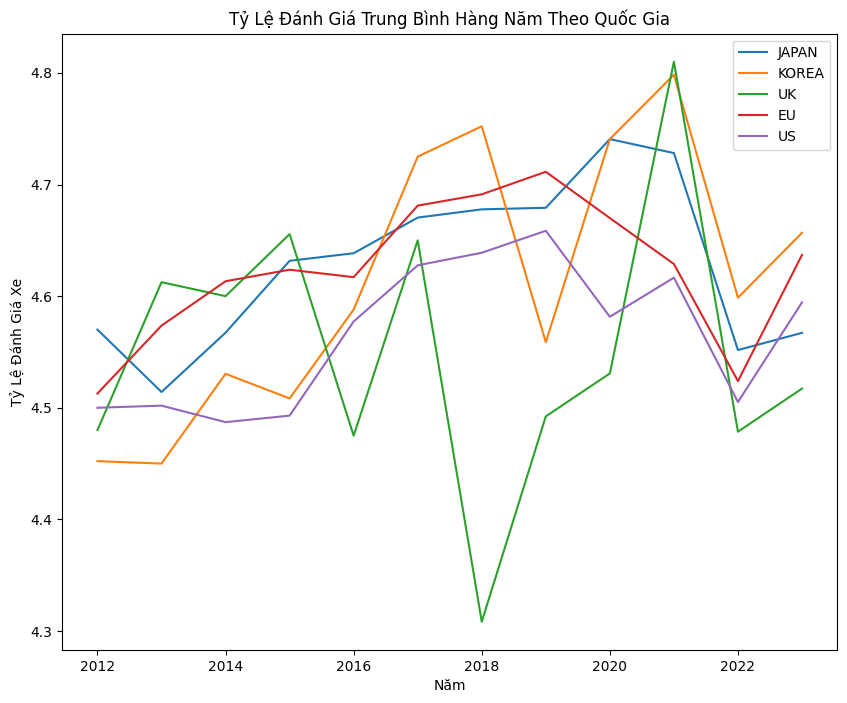

In [17]:
# Khởi tạo từ điển để giữ trung bình tỷ lệ cho mỗi quốc gia
country_avg_rates = {country: [] for country in Countries}

# Tính trung bình tỷ lệ hàng năm cho mỗi quốc gia
for country_tuple, country_name in zip(Country_brands, Countries):
    # Lọc DataFrame theo các thương hiệu thuộc một quốc gia cụ thể
    df_country = df.filter(F.col('Brand').isin(*country_tuple))  # Sử dụng * để unpack danh sách

    # Tính trung bình tỷ lệ hàng năm cho mỗi thương hiệu trong DataFrame đã lọc
    for year in years:
        avg_rate = df_country.filter(df_country['Year'] == year).select(avg('General_rate')).collect()

        # Nếu không có dữ liệu (tỷ lệ) cho năm đó, thêm None để duy trì độ dài danh sách nhất quán
        if avg_rate:
            country_avg_rates[country_name].append(avg_rate[0][0])
        else:
            country_avg_rates[country_name].append(None)

# Vẽ biểu đồ dòng sử dụng matplotlib
plt.figure(figsize=(10, 8))

for country_name in Countries:
    plt.plot(years, country_avg_rates[country_name], label=country_name)

plt.xlabel('Năm')
plt.ylabel('Tỷ Lệ Đánh Giá Xe')
plt.title('Tỷ Lệ Đánh Giá Trung Bình Hàng Năm Theo Quốc Gia')
plt.legend()
plt.show()

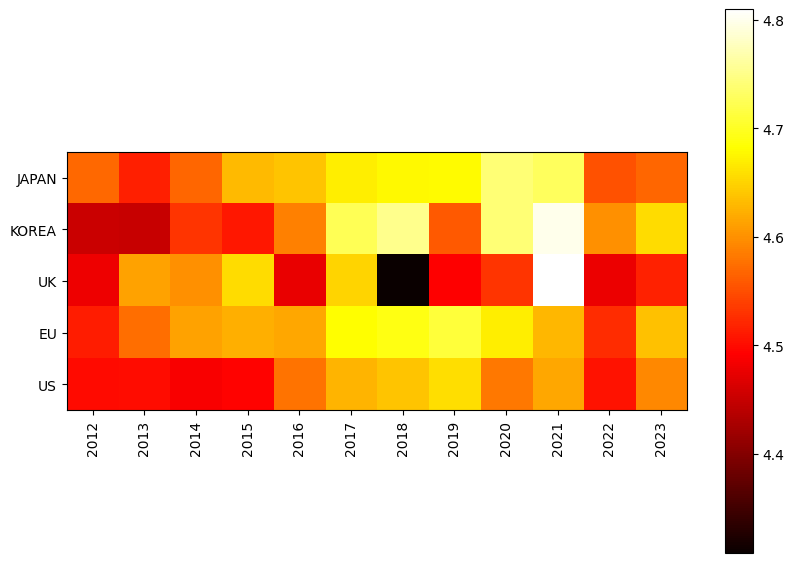

In [18]:
# Chuyển đổi dữ liệu thành dạng list của lists để vẽ heatmap
heatmap_data = [country_avg_rates[country] for country in Countries]

# Vẽ heatmap sử dụng matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=range(len(years)), labels=years, rotation=90)  # Xoay các nhãn trục x
plt.yticks(ticks=range(len(Countries)), labels=Countries)
plt.subplots_adjust(bottom=0.2)  # Điều chỉnh khoảng cách giữa các nhãn
plt.show()

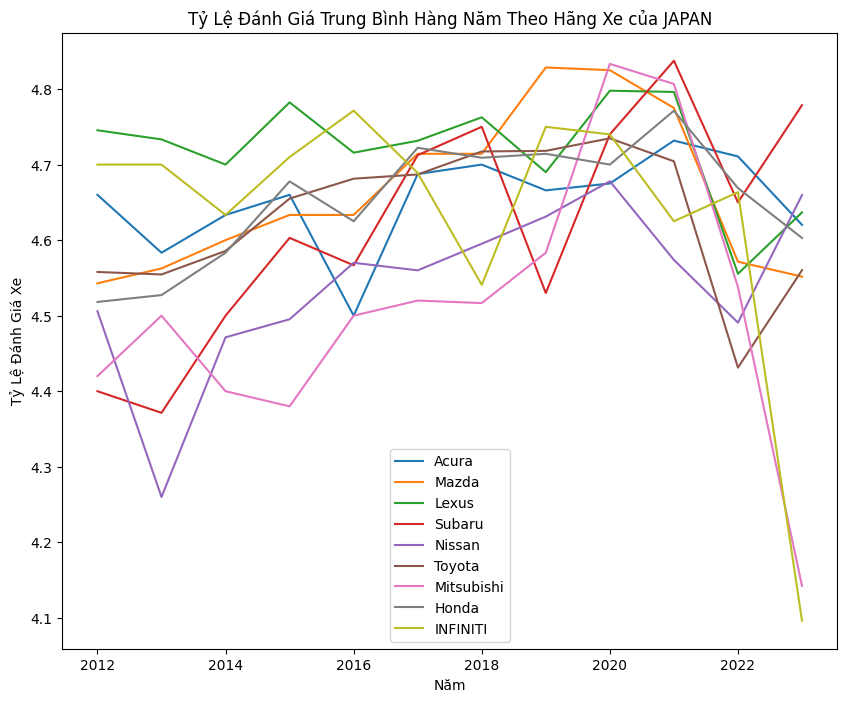

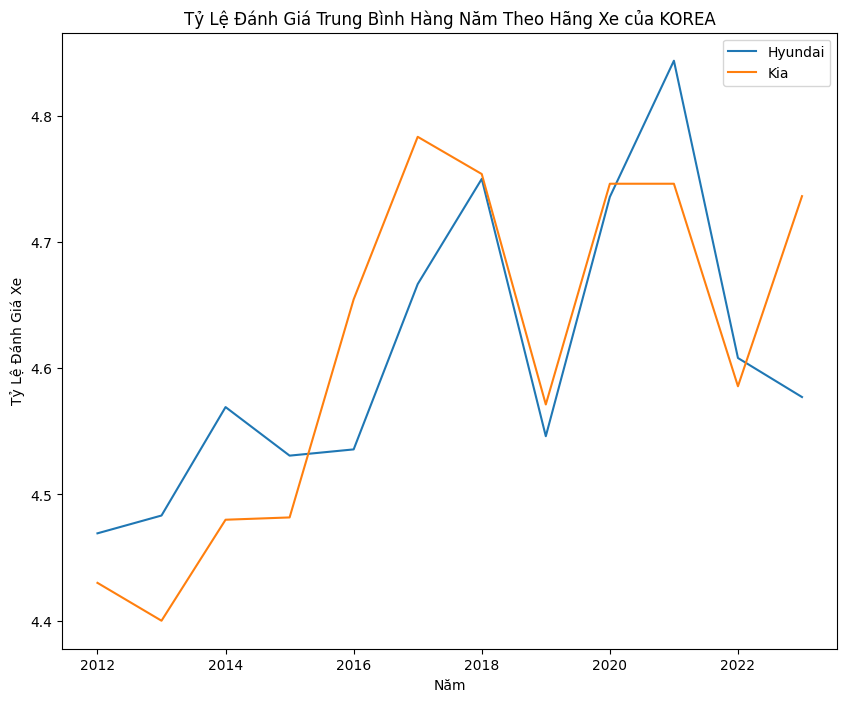

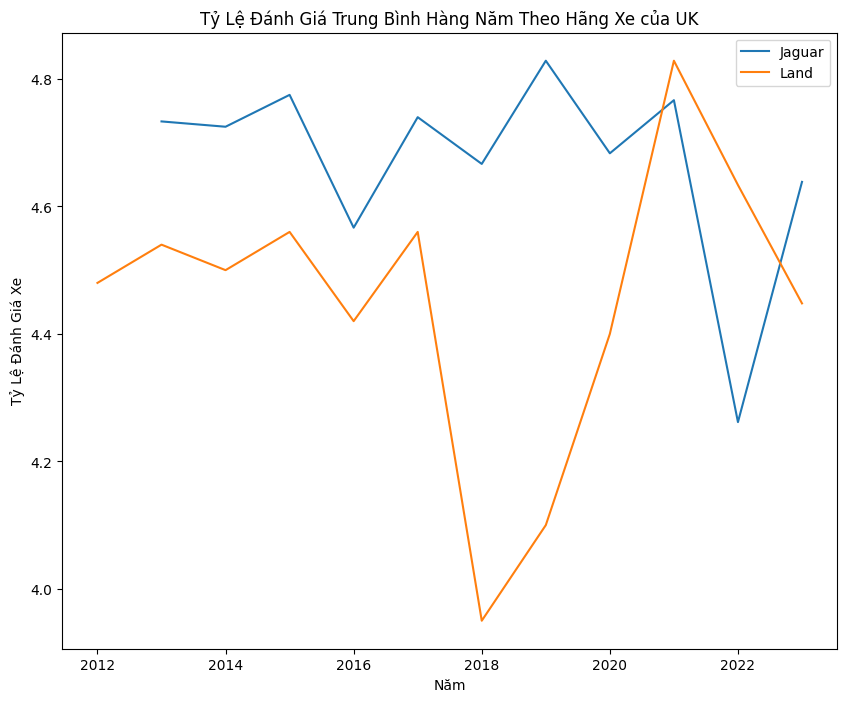

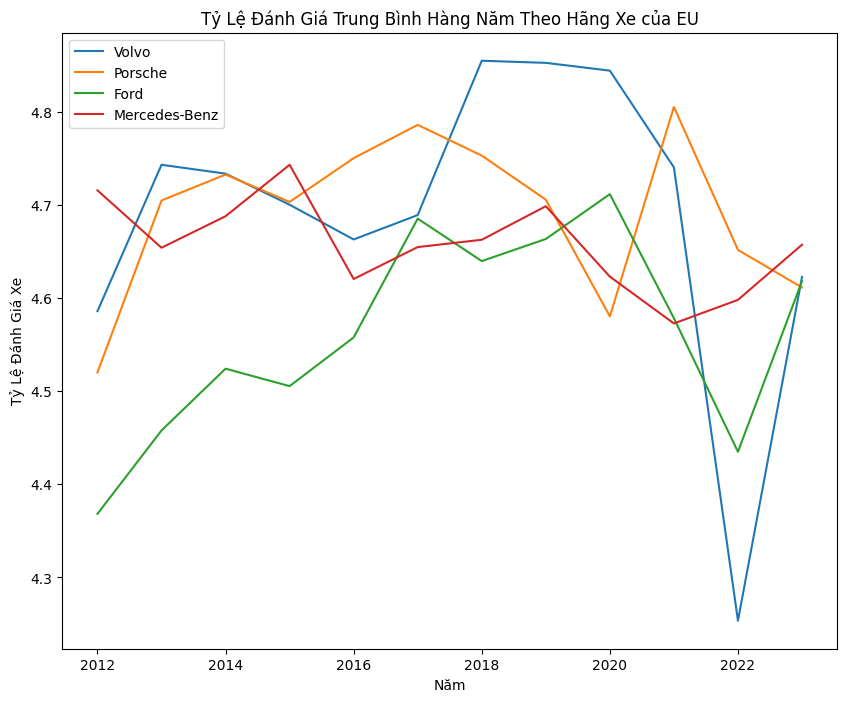

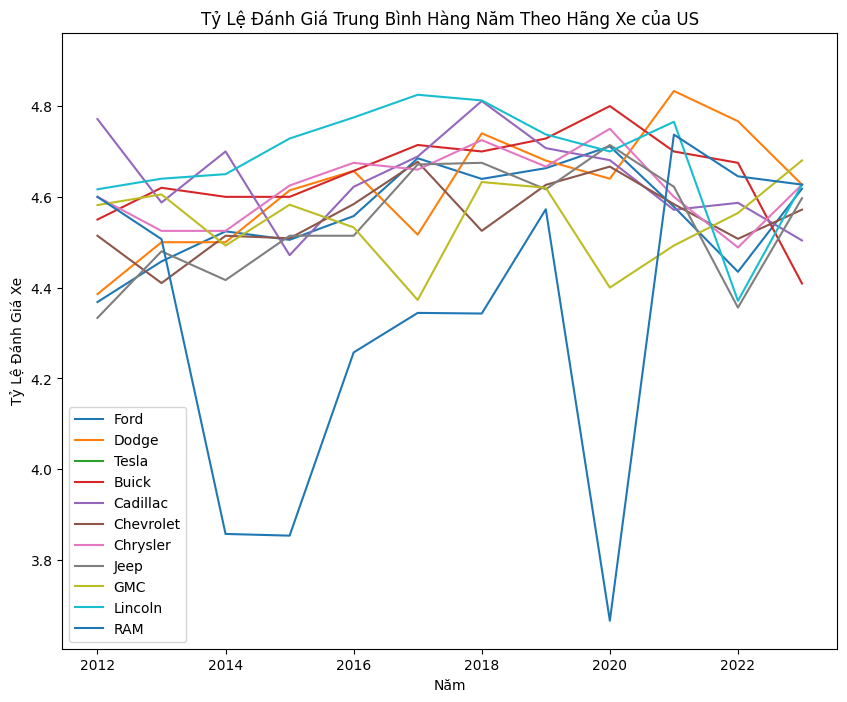

In [19]:
# Khởi tạo một dictionary để lưu trữ dữ liệu biểu đồ dòng cho mỗi quốc gia
country_line_data = {country: {brand: [] for brand in Country_brands[index]} for index, country in enumerate(Countries)}

# Lặp qua mỗi quốc gia và thương hiệu xe để thu thập dữ liệu trung bình 'General_rate'
for country in Countries:
    for brand in Country_brands[Countries.index(country)]:
        for year in years:
            avg_rate = df.filter((col('Brand') == brand) & (col('Year') == year)).select(avg('General_rate')).collect()
            if avg_rate:
                country_line_data[country][brand].append(avg_rate[0][0])
            else:
                country_line_data[country][brand].append(None)

# Vẽ biểu đồ dòng cho mỗi quốc gia
for country, brands_data in country_line_data.items():
    plt.figure(figsize=(10, 8))
    for brand, rates in brands_data.items():
        plt.plot(years, rates, label=brand)
    plt.xlabel('Năm')
    plt.ylabel('Tỷ Lệ Đánh Giá Xe')
    plt.title(f'Tỷ Lệ Đánh Giá Trung Bình Hàng Năm Theo Hãng Xe của {country}')
    plt.legend()
    plt.show()
